# PROJECT EECS 4404

Preprocessing 

**Feature selection**

**Feature extraction**

In [1]:
# %pip install xgboost
# %pip install lightgbm
# %pip install imbalanced-learn

In [2]:

# Data Manipulation
import numpy as np 
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, RocCurveDisplay
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from   sklearn.neighbors import KNeighborsClassifier
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   imblearn.over_sampling import RandomOverSampler
from   sklearn.feature_selection import SelectKBest, f_classif, RFECV
from   sklearn.neural_network import MLPClassifier

# Keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import SGD, Adam, Adadelta, RMSprop
# import keras.backend as K

input_file_name = "data/Player Per Game.csv"
input_target_class = 'pos'
nba_players = label = features = X = Y = None
encoder = OneHotEncoder()


def visualizeData(nba_players):
    ### no null values
    nba_players.info()  
    ## metrics
    print(nba_players.groupby(input_target_class).mean())
    # count of the values to make sure it was relatively balanced
    print(nba_players[input_target_class].value_counts())

def dropColumns(players, features):
    ## drop some irrevelant features
    players.drop(features, axis=1, inplace=True)
 


In [3]:
nba_players = pd.read_csv(input_file_name).replace({"C-SF": "C", "C-F": "C", "C-PF": "C", "PG-SG": "PG","PG-SF":"PG",  "PF-SF": "PF", "PF-C": "PF", "SF-SG": "SF", "SF-PG": "SF", "PF-C": "PF", "SG-SF": "SG", "SG-PG": "SG", "SG-PF": "SG", "SF-C": "SF", "SG-SF": "SG", "SG-PG-SF": "SG", "SF-PF": "SF",})
nba_players.drop_duplicates(inplace=True)
nba_players = nba_players[nba_players['pos'].isin(["SG", "PF", "C", "SF", "PG"])]
dropColumns(nba_players, {'seas_id', 'season', 'player_id', 'player', 'birth_year','age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game'})
features = list(nba_players.columns.delete(0))

for i in nba_players.columns[nba_players.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
   nba_players[i].fillna(nba_players[i].mean(),inplace=True)


x = nba_players[features].values
y = nba_players[input_target_class].values
y = encoder.fit_transform(np.reshape(y, (-1, 1))).toarray()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.18, random_state=42)
min_max_scaler = MinMaxScaler().fit(X_train)  
X_train, X_test = min_max_scaler.transform(X_train), min_max_scaler.transform(X_test)

X_train.shape


(25064, 22)

In [4]:
visualizeData(nba_players)
dropColumns(nba_players, input_target_class) 
nba_players.skew()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30567 entries, 0 to 31534
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pos            30567 non-null  object 
 1   fg_per_game    30567 non-null  float64
 2   fga_per_game   30567 non-null  float64
 3   fg_percent     30567 non-null  float64
 4   x3p_per_game   30567 non-null  float64
 5   x3pa_per_game  30567 non-null  float64
 6   x3p_percent    30567 non-null  float64
 7   x2p_per_game   30567 non-null  float64
 8   x2pa_per_game  30567 non-null  float64
 9   x2p_percent    30567 non-null  float64
 10  e_fg_percent   30567 non-null  float64
 11  ft_per_game    30567 non-null  float64
 12  fta_per_game   30567 non-null  float64
 13  ft_percent     30567 non-null  float64
 14  orb_per_game   30567 non-null  float64
 15  drb_per_game   30567 non-null  float64
 16  trb_per_game   30567 non-null  float64
 17  ast_per_game   30567 non-null  float64
 18  stl_pe

fg_per_game      1.015685
fga_per_game     0.935758
fg_percent      -0.449294
x3p_per_game     2.010991
x3pa_per_game    1.785295
x3p_percent      0.484556
x2p_per_game     1.190572
x2pa_per_game    1.153084
x2p_percent     -0.341590
e_fg_percent    -0.437402
ft_per_game      1.629558
fta_per_game     1.570396
ft_percent      -1.436705
orb_per_game     1.538010
drb_per_game     1.477636
trb_per_game     1.633362
ast_per_game     1.846789
stl_per_game     1.248359
blk_per_game     3.028837
tov_per_game     1.045606
pf_per_game      0.091628
pts_per_game     1.056928
dtype: float64

/Users/michaeldavid/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


            Specs        Score
16   ast_per_game  2336.868907
13   orb_per_game  1914.252827
18   blk_per_game  1673.675158
15   trb_per_game  1605.388320
14   drb_per_game  1035.885538
4   x3pa_per_game   880.559484
3    x3p_per_game   747.019180
12     ft_percent   560.848951
17   stl_per_game   519.001360
20    pf_per_game   359.370089


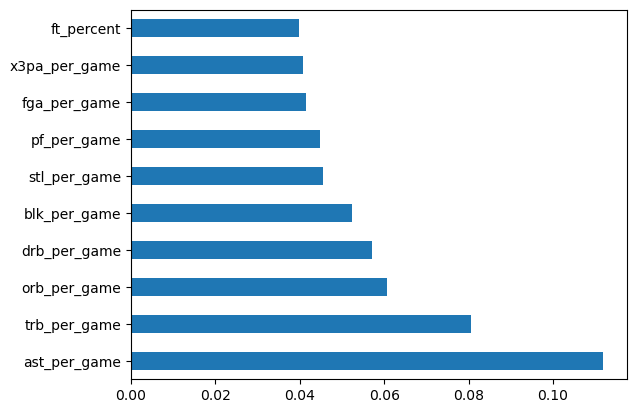

Optimal number of features: 16


In [5]:
topFeatures = 10
selector = SelectKBest(score_func=f_classif, k=topFeatures)  
fit = selector.fit(X_train, encoder.inverse_transform(y_train))

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(topFeatures,'Score'))

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.nlargest(topFeatures).plot(kind='barh')
plt.show()

rfc = RandomForestClassifier()
min_features_to_select = 1  # Minimum number of features to consider

rfecv = RFECV(
    estimator=rfc,
    step=1,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

In [6]:
mask = rfecv.get_support()
# mask[2] = False
# mask[6] = mask[15] = True
best_features = nba_players.columns[mask]
print(best_features)  # choose using rfev selectKbest and featureInportance form classifiers
X_old = X_train
x_test = X_test
X_train = X_train[:,mask]
X_test  = X_test[:,mask]


Index(['fga_per_game', 'fg_percent', 'x3pa_per_game', 'x2pa_per_game',
       'x2p_percent', 'e_fg_percent', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'pf_per_game', 'pts_per_game'],
      dtype='object')


In [7]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of prediction is: ", accuracy)

# find number of accurate predictions
accurate_predictions = accuracy_score(y_test, predictions, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

model = RandomForestClassifier()
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of prediction is: ", accuracy)

# find number of accurate predictions
accurate_predictions = accuracy_score(y_test, predictions, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

model = ExtraTreesClassifier()
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of prediction is: ", accuracy)

# find number of accurate predictions
accurate_predictions = accuracy_score(y_test, predictions, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

model  = KNeighborsClassifier()
model = model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of prediction is: ", accuracy)

# find number of accurate predictions
accurate_predictions = accuracy_score(y_test, predictions, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

The accuracy of prediction is:  0.520079956387425
The number of accurate predictions is:  2862
The accuracy of prediction is:  0.4592040705069962
The number of accurate predictions is:  2527
The accuracy of prediction is:  0.4344902780301654
The number of accurate predictions is:  2391
The accuracy of prediction is:  0.4344902780301654
The number of accurate predictions is:  2391


In [8]:
#https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af
mlp = MLPClassifier(hidden_layer_sizes=(11,5, 2), activation='relu', solver='adam', max_iter=30000)
mlp.fit(X_train,y_train)

predictions = mlp.predict(X_train)
# predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_train, predictions)
print("The accuracy of prediction is: ", accuracy)

# find number of accurate predictions
accurate_predictions = accuracy_score(y_train, predictions, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

The accuracy of prediction is:  0.37180817108203
The number of accurate predictions is:  9319


In [9]:

# Import pandas and glob
import pandas as pd
import glob

# Get a list of all the CSV files in a directory
files = glob.glob("data/Player Per Game.csv")

# Initialize an empty dataframe to hold the combined data
combined_df = pd.DataFrame()

# Loop through the files and read each one into a dataframe
for file in files:
    df = pd.read_csv(file)
    # Concatenate the dataframe to the combined dataframe
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Print the combined dataframe
print(combined_df)

       seas_id  season  player_id          player  birth_year  pos   age  \
0        31136    2024       5025      A.J. Green         NaN   SG  24.0   
1        31137    2024       5027      AJ Griffin         NaN   SF  20.0   
2        31138    2024       4219    Aaron Gordon         NaN   PF  28.0   
3        31139    2024       4582   Aaron Holiday         NaN   PG  27.0   
4        31140    2024       4805   Aaron Nesmith         NaN   SF  24.0   
...        ...     ...        ...             ...         ...  ...   ...   
31545      200    1947        157     Walt Miller         NaN    F  31.0   
31546      201    1947        158   Warren Fenley         NaN    F  24.0   
31547      202    1947        159   Wilbert Kautz         NaN  G-F  31.0   
31548      203    1947        160  Woody Grimshaw         NaN    G  27.0   
31549      204    1947        161     Wyndol Gray         NaN  G-F  24.0   

       experience   lg   tm  ...  ft_percent  orb_per_game  drb_per_game  \
0          

In [10]:
combined_df.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game'],
      dtype='object')

'seas_id', 'season', 'player_id', 'player', 'birth_year','age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game'

In [11]:
X_train.shape

(25064, 16)

In [24]:
# Sample tf/keras model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Could also add dropout 0.1 layers in between
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(5, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Potentially add for preventing overfit
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test)) #callbacks=[reduce_lr, early_stop]

print("Training accuracy:", history.history['accuracy'])
print("Training loss:", history.history['loss'])
print("Validation accuracy:", history.history['val_accuracy'])
print("Validation loss:", history.history['val_loss'])

Epoch 1/50
784/784 [==============================] - 3s 2ms/step - loss: 1.0253 - accuracy: 0.5426 - val_loss: 0.9543 - val_accuracy: 0.5748
Epoch 2/50
784/784 [==============================] - 1s 2ms/step - loss: 0.9417 - accuracy: 0.5806 - val_loss: 0.9290 - val_accuracy: 0.5826
Epoch 3/50
784/784 [==============================] - 1s 2ms/step - loss: 0.9267 - accuracy: 0.5845 - val_loss: 0.9238 - val_accuracy: 0.5915
Epoch 4/50
784/784 [==============================] - 1s 2ms/step - loss: 0.9151 - accuracy: 0.5918 - val_loss: 0.9052 - val_accuracy: 0.5949
Epoch 5/50
784/784 [==============================] - 1s 2ms/step - loss: 0.9071 - accuracy: 0.5959 - val_loss: 0.9416 - val_accuracy: 0.5751
Epoch 6/50
784/784 [==============================] - 1s 2ms/step - loss: 0.9024 - accuracy: 0.5981 - val_loss: 0.8916 - val_accuracy: 0.6026
Epoch 7/50
784/784 [==============================] - 1s 2ms/step - loss: 0.8973 - accuracy: 0.6013 - val_loss: 0.9210 - val_accuracy: 0.5797
Epoch 